In [1]:
import tensorflow as tf
import cv2 as cv 
import albumentations as alb

In [3]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [4]:
def load_(load):
    try:
        load_models=load_model(load)
        print("Load Model Success")
        return load_models
    except Exception as e :
        print(e)

In [5]:
load=load_('model/imageclassifier.h5')

Load Model Success


### Crop gambar yang ada mata utuh beserta palpebral

In [36]:
path='static/prediksi/15.jpg'
img = image.load_img(path,target_size=(256, 256))
x = image.img_to_array(img)
cropped_image = x[50:200, 180:200]
print("Image shape before Crop -> ",x.shape)
print("Image shape after Crop -> ",cropped_image.shape)

Image shape before Crop ->  (256, 256, 3)
Image shape after Crop ->  (150, 20, 3)


Tampilkan gambar sesudah di crop

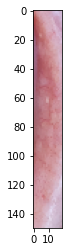

In [37]:
plt.imshow(cropped_image/255.)
plt.savefig('crop.png')
plt.show()

Tampilkan gambar sebelum di crop

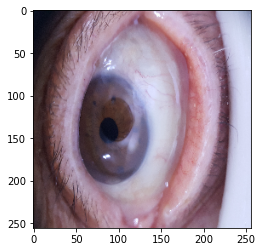

In [39]:
plt.imshow(x/255.)
plt.savefig('original.png')

plt.show()

Resize ukuran gambar sesudah di crop ke 256,256 <br>
agar dapat dimasukkan prediksi, karena model latih menggunakan input size 256,256

In [20]:
crop_resize=cv.resize(cropped_image,(256,256))

Mengecek shape gambar crop sesudah di resize

In [21]:
print("Image shape after Crop -> ",crop_resize.shape)

Image shape after Crop ->  (256, 256, 3)


Tampilkan gambar sesudah di crop yang di resize

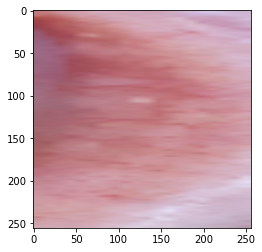

In [22]:
plt.imshow(crop_resize/255.)
plt.show()

In [23]:
import numpy as np

In [24]:
try:
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = load.predict(images, batch_size=10)
    print(classes)
    if classes>=0.9:
        print(path + "\n Anemia")
    else :
        print(path + "\n Normal")
except Exception as e:
    print(e)        

1/1 [==============================] - 0s 24ms/step
[[0.79636735]]
static/prediksi/15.jpg
 Normal


Make Csv for report

In [14]:
nomor=np.arange(123)
nomor=nomor+1

In [173]:
import pandas as pd
data = {
  "Italy": ["Anemia","Anemia","Anemia","Normal","Normal","Normal","Anemia","Normal","Anemia","Normal","Normal","Anemia","Anemia","Anemia","Normal","Normal"],
  "AutoCrop_Italy":["Anemia","Anemia","Anemia","Normal","Anemia","Normal","Anemia","Normal","Normal","Normal","Normal","Anemia","Normal","Normal","Normal","Normal"]
}
data=pd.DataFrame(data)

In [16]:
df = pd.DataFrame(nomor, columns = ['Nomor'])
df.head()

,Nomor
0,1
1,2
2,3
3,4
4,5


In [174]:
gabung=pd.concat([df,data],axis=1)
gabung.head(20)

,Nomor,Italy,AutoCrop_Italy
0,1,Anemia,Anemia
1,2,Anemia,Anemia
2,3,Anemia,Anemia
3,4,Normal,Normal
4,5,Normal,Anemia
5,6,Normal,Normal
6,7,Anemia,Anemia
7,8,Normal,Normal
8,9,Anemia,Normal
9,10,Normal,Normal


In [ ]:
update=gabung.to_excel("Hasil.xlsx")